<a href="https://colab.research.google.com/github/Djani5/Krokodil-u-Bari/blob/main/Cell_Wars_(part_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

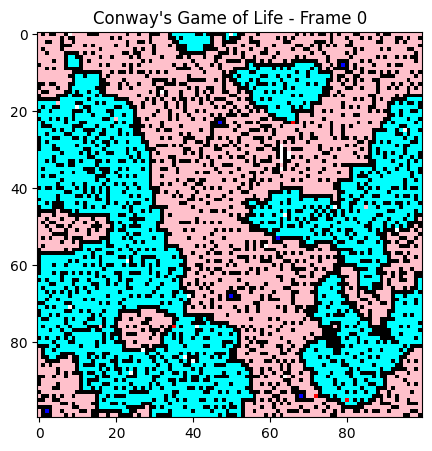

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.colors import ListedColormap
from IPython.display import HTML


def empty_space(grid):
   return ((grid['normal_cells'] | grid['blue_special_cells'] | grid['red_special_cells'] | grid['blue_warrior_cells'] | grid['red_warrior_cells']) == 0).astype(int)
def imgGrid(grid):   #  ['black', 'white','blue','red', 'cyan', 'pink']
  return (grid['normal_cells'] +
    2 * ((grid['blue_special_cells'] != 0).astype(int))+
    3 * ((grid['red_special_cells'] != 0).astype(int)) +
    4 * grid['blue_warrior_cells'] +
    5 * grid['red_warrior_cells'])

def spawn_blue_special_cell(matrix, N):
    i,j = 0,0
    indices = np.argwhere(matrix == 0)
    random_index = np.random.choice(len(indices))
    i,j = indices[random_index]
    return i,j

def spawn_red_special_cell(matrix, N):
    i,j = 0,0
    indices = np.argwhere(matrix == 0)
    random_index = np.random.choice(len(indices))
    i,j = indices[random_index]
    return i,j


# returns matrix of neighbors of a specific type
def neighbors(specific_cell_type):

      neighbors = (
        np.roll(specific_cell_type, 1, axis=0) +
        np.roll(specific_cell_type, -1, axis=0) +
        np.roll(specific_cell_type, 1, axis=1) +
        np.roll(specific_cell_type, -1, axis=1) +
        np.roll(np.roll(specific_cell_type, 1, axis=0), 1, axis=1) +
        np.roll(np.roll(specific_cell_type, 1, axis=0), -1, axis=1) +
        np.roll(np.roll(specific_cell_type, -1, axis=0), 1, axis=1) +
        np.roll(np.roll(specific_cell_type, -1, axis=0), -1, axis=1))

      return neighbors


def update(frameNum, img, grid, N, K):

    new_grid = grid.copy()
    all_cells =  ((grid['normal_cells'] | grid['blue_special_cells'] | grid['red_special_cells'] | grid['blue_warrior_cells'] | grid['red_warrior_cells']) != 0).astype(int)

    # spawn blue special cell
    i, j = spawn_blue_special_cell(all_cells - grid['blue_warrior_cells'], N)
    grid['blue_special_cells'][i, j] = K
    binary_blue_special_cells = (grid['blue_special_cells'] != 0).astype(int)

    # spawn red special cell
    i, j = spawn_red_special_cell(all_cells - grid['red_warrior_cells'], N)
    grid['red_special_cells'][i, j] = K
    binary_red_special_cells = (grid['red_special_cells'] != 0).astype(int)


    normal_neighbors = neighbors(grid['normal_cells'])
    red_neighbors = neighbors(grid['red_warrior_cells'] + binary_red_special_cells)
    blue_neighbors = neighbors(grid['blue_warrior_cells'] + binary_blue_special_cells)

    for i in range(N):
        for j in range(N):
            if grid['empty'][i][j] == 1:  # Spawning
                if (normal_neighbors[i][j] == 3) and (red_neighbors[i][j] == 0) and (blue_neighbors[i][j] == 0):
                    new_grid['normal_cells'][i][j] = 1
                if (normal_neighbors[i][j] + red_neighbors[i][j] == 3) and (red_neighbors[i][j] > 0) and (blue_neighbors[i][j] == 0):
                    new_grid['red_warrior_cells'][i][j] = 1
                if (normal_neighbors[i][j] + blue_neighbors[i][j] == 3) and (blue_neighbors[i][j] > 0) and (red_neighbors[i][j] == 0):
                    new_grid['blue_warrior_cells'][i][j] = 1
            else:  # Dying

                if (grid['normal_cells'][i][j] == 1):
                    if (normal_neighbors[i][j] + red_neighbors[i][j] + blue_neighbors[i][j] > 3) or (normal_neighbors[i][j] + red_neighbors[i][j] + blue_neighbors[i][j] < 2):
                        new_grid['normal_cells'][i][j] = 0

                if grid['red_warrior_cells'][i][j] and blue_neighbors[i][j] > 0:
                  new_grid['red_warrior_cells'][i][j] = 0
                if grid['blue_warrior_cells'][i][j] and red_neighbors[i][j] > 0:
                  new_grid['red_warrior_cells'][i][j] = 0
                if grid['blue_warrior_cells'][i][j] == 1:
                    if neighbors(grid['blue_warrior_cells'])[i][j] > 0:
                        new_grid['red_warrior_cells'][i][j] = 0
                if grid['blue_warrior_cells'][i][j] == 1:  # Dies if it touches any red cells
                    if neighbors(grid['red_warrior_cells'])[i][j] > 0:
                        new_grid['blue_warrior_cells'][i][j] = 0



    # update special cells
    new_grid['blue_special_cells'] = new_grid['blue_special_cells'] - 1
    new_grid['blue_special_cells'][new_grid['blue_special_cells'] < 0] = 0

    new_grid['red_special_cells'] = new_grid['red_special_cells'] - 1
    new_grid['red_special_cells'][new_grid['red_special_cells'] < 0] = 0


    new_grid['empty'] = empty_space(new_grid)


    img.set_data(imgGrid(grid))

    for key in new_grid:
      grid[key][:] = new_grid[key][:]

    title.set_text('Conway\'s Game of Life - Frame {}'.format(frameNum))
    return (img, title)

# Set the size of the grid
# PARAMS
N = 100
K = 10
frames = 100
# Set the animation update interval (in milliseconds)
updateInterval = 200

# Set up the initial state and special cells
grid = {
  'empty' : np.ones((N, N)).astype(np.int64),
  'normal_cells' : np.random.choice([0, 1], N*N, p=[0.5, 0.5]).reshape(N, N),
  'blue_special_cells' : np.zeros((N, N)).astype(np.int64),
  'red_special_cells' : np.zeros((N, N)).astype(np.int64),
  'blue_warrior_cells' : np.zeros((N, N)).astype(np.int64),
  'red_warrior_cells' : np.zeros((N, N)).astype(np.int64),
  }

# Set up the animation
fig, ax = plt.subplots(figsize=(5,5))



# 0 - nobody
# 1 - normal cell
# 2 - blue special
# 3 - cyan - from blue
# 4 - red - special
# 5 - yellow - from red

# Plot the matrix using imshow

grid['blue_special_cells'][0][0] = K
grid['red_special_cells'][N-1][N-1] = K
grid['normal_cells'][0][0] = 0
grid['normal_cells'][N-1][N-1] = 0
grid['empty'] = empty_space(grid)

img = ax.imshow( imgGrid(grid),
                cmap=plt.matplotlib.colors.ListedColormap(['black', 'white','blue','red', 'cyan', 'pink']),
                 vmin = 0, vmax = 6)

title = ax.set_title('Conway\'s Game of Life')
ani = animation.FuncAnimation(fig,
                              update,
                              fargs=(img, grid, N, K),
                              frames=frames,
                              interval=updateInterval
                             )


HTML(ani.to_html5_video())